In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
df_em = pd.read_csv("../../data/raw/owid_emissions.csv") #Emissions dataframe

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')).sort_values(by=["name"]).reset_index()
world

,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,103,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,125,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,82,43053054.0,Africa,Algeria,DZA,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,74,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,159,4490.0,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."
...,...,...,...,...,...,...,...
172,2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
173,157,29161922.0,Asia,Yemen,YEM,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
174,70,17861030.0,Africa,Zambia,ZMB,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
175,48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [ ]:
emissions = df_em.drop(df_em[df_em["year"] < 1960].index)
emissions

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
110,Afghanistan,1960,AFG,8622473.0,1.303325e+10,0.018,0.002,0.414,0.029,7.623,...,NaN,0.0,0.0,0.275,0.009,NaN,NaN,NaN,NaN,NaN
111,Afghanistan,1961,AFG,8790140.0,1.314629e+10,0.022,0.002,0.491,0.077,18.583,...,NaN,0.0,0.0,0.261,0.009,NaN,NaN,NaN,NaN,NaN
112,Afghanistan,1962,AFG,8969055.0,1.336763e+10,0.029,0.003,0.689,0.198,40.301,...,NaN,0.0,0.0,0.242,0.010,NaN,NaN,NaN,NaN,NaN
113,Afghanistan,1963,AFG,9157463.0,1.363030e+10,0.051,0.006,0.707,0.018,2.635,...,NaN,0.0,0.0,0.250,0.010,NaN,NaN,NaN,NaN,NaN
114,Afghanistan,1964,AFG,9355510.0,1.387050e+10,0.062,0.007,0.839,0.132,18.651,...,NaN,0.0,0.0,0.205,0.012,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


In [ ]:
emissions.replace({"United States":"United States of America"}, inplace=True)

In [ ]:
pivot = emissions.pivot(index="country",columns=["year"],values=["co2"])


In [ ]:
pivot = pivot[pivot.index.isin(world["name"].unique().tolist())]
pivot

co2                                                          \
year           1960    1961    1962    1963    1964    1965    1966    1967   
country                                                                       
Afghanistan   0.414   0.491   0.689   0.707   0.839   1.007   1.091   1.282   
Albania       2.022   2.279   2.462   2.081   2.015   2.172   2.550   2.677   
Algeria       6.151   6.056   5.661   5.419   5.643   6.589   8.421   8.432   
Angola        0.549   0.454   1.179   1.150   1.223   1.186   1.552   0.992   
Antarctica      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...             ...     ...     ...     ...     ...     ...     ...     ...   
Venezuela    57.017  51.880  54.056  56.152  56.550  60.730  56.974  65.752   
Vietnam       7.484   7.978   9.338   9.110  11.788  13.150  19.181  22.962   
Yemen         3.631   2.664   3.884   2.917   3.631   3.928   3.462   3.052   
Zambia        4.355   3.709   3.583   3.444   3.275   3.912   3.498   4.788   
Zimbabwe      5.943   5.061   4.889   4.700   4.469   5.209   6.041   5.294   

                             ...                                               \
year           1968    1969  ...     2012     2013     2014     2015     2016   
country                      ...                                                
Afghanistan   1.223   0.941  ...   10.035    9.251    9.170    9.791    9.068   
Albania       3.069   3.241  ...    4.850    5.287    6.000    4.712    4.632   
Algeria       9.050  11.263  ...  135.674  140.786  151.283  160.087  158.748   
Angola        1.670   2.783  ...   25.540   24.719   25.148   25.531   27.210   
Antarctica      NaN     NaN  ...      NaN      NaN      NaN      NaN      NaN   
...             ...     ...  ...      ...      ...      ...      ...      ...   
Venezuela    65.572  68.933  ...  175.723  198.427  175.961  165.853  152.385   
Vietnam      23.601  27.056  ...  144.373  151.518  183.825  217.729  226.100   
Yemen        11.637   4.675  ...   20.356   27.160   26.477   14.084   10.902   
Zambia        4.568   4.271  ...    4.166    4.416    4.877    5.065    5.857   
Zimbabwe      6.378   6.744  ...   11.254   11.671   11.946   12.255   10.533   

                                                          
year            2017     2018     2019     2020     2021  
country                                                   
Afghanistan    9.868   10.818   11.082   11.682   11.874  
Albania        5.564    4.984    4.947    4.729    4.619  
Algeria      166.411  173.912  179.505  172.504  176.269  
Angola        24.304   22.779   21.818   20.276   21.363  
Antarctica       NaN      NaN      NaN      NaN      NaN  
...              ...      ...      ...      ...      ...  
Venezuela    140.385  102.672   89.111   76.467   79.747  
Vietnam      233.041  274.223  341.005  328.900  326.014  
Yemen         10.589   10.474   12.684   12.140   12.477  
Zambia         6.843    7.412    7.747    7.281    7.676  
Zimbabwe       9.596   11.795   11.115   10.608   11.296  

[162 rows x 62 columns]

In [ ]:
world.index = world["name"]
for i in range(1960,2022):
    curr = f"{i}_co2"
    world[curr] = pivot["co2",i]
world

,index,pop_est,continent,name,iso_a3,gdp_md_est,geometry,1960_co2,1961_co2,1962_co2,...,2012_co2,2013_co2,2014_co2,2015_co2,2016_co2,2017_co2,2018_co2,2019_co2,2020_co2,2021_co2
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,103,38041754.0,Asia,Afghanistan,AFG,19291,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",0.414,0.491,0.689,...,10.035,9.251,9.170,9.791,9.068,9.868,10.818,11.082,11.682,11.874
Albania,125,2854191.0,Europe,Albania,ALB,15279,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",2.022,2.279,2.462,...,4.850,5.287,6.000,4.712,4.632,5.564,4.984,4.947,4.729,4.619
Algeria,82,43053054.0,Africa,Algeria,DZA,171091,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",6.151,6.056,5.661,...,135.674,140.786,151.283,160.087,158.748,166.411,173.912,179.505,172.504,176.269
Angola,74,31825295.0,Africa,Angola,AGO,88815,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",0.549,0.454,1.179,...,25.540,24.719,25.148,25.531,27.210,24.304,22.779,21.818,20.276,21.363
Antarctica,159,4490.0,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W. Sahara,2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,157,29161922.0,Asia,Yemen,YEM,22581,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",3.631,2.664,3.884,...,20.356,27.160,26.477,14.084,10.902,10.589,10.474,12.684,12.140,12.477
Zambia,70,17861030.0,Africa,Zambia,ZMB,23309,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",4.355,3.709,3.583,...,4.166,4.416,4.877,5.065,5.857,6.843,7.412,7.747,7.281,7.676


<AxesSubplot:>

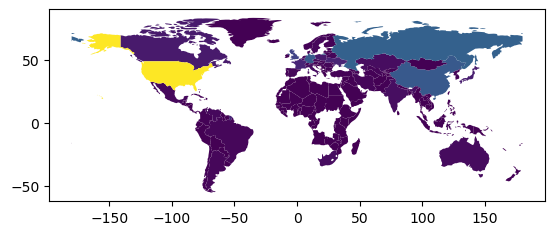

In [ ]:
world.plot(column="1960_co2")